In [1]:
import pandas as  pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set()

In [3]:
proj_dir = '/project/sds-capstone-aaai/met'
db_file = proj_dir + '/data/mapi.db'

In [4]:
db = sqlite3.connect(mapi.db)

OperationalError: unable to open database file

In [6]:
objects = pd.read_sql("select * from object", db)
# with sqlite3.connect(db_file) as db:
#     objects = pd.read_sql("select * from object", db)
objects = objects.drop_duplicates()
objects = objects.loc[objects.primaryImage != '']
objects = objects.loc[~objects.primaryImage.isna()]
objects = objects.set_index('objectID')

In [7]:
objects = objects.sort_index()

In [8]:
objects.head()

,isHighlight,accessionNumber,isPublicDomain,primaryImage,primaryImageSmall,additionalImages,constituents,department,objectName,title,...,locus,excavation,river,classification,rightsAndReproduction,linkResource,metadataDate,repository,objectURL,tags
objectID,,,,,,,,,,,,,,,,,,,,,
34,False,1970.289.6,True,https://images.metmuseum.org/CRDImages/ad/orig...,https://images.metmuseum.org/CRDImages/ad/web-...,[],"[{'role': 'Maker', 'name': 'Forestville Manufa...",The American Wing,Clock,Acorn Clock,...,,,,Furniture,,,2019-07-31T03:00:40.447Z,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/searc...,"['Landscapes', 'Boats']"
37,False,38.165.51,True,https://images.metmuseum.org/CRDImages/ad/orig...,https://images.metmuseum.org/CRDImages/ad/web-...,['https://images.metmuseum.org/CRDImages/ad/or...,"[{'role': 'Maker', 'name': 'Pierre Stephan'}]",The American Wing,Figure,Figure of Admiral George Rodney,...,,,,Ceramics,,,2019-02-01T10:50:49.477Z,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/searc...,"['Cannons', 'Swords', 'Men']"
38,False,38.165.50,True,https://images.metmuseum.org/CRDImages/ad/orig...,https://images.metmuseum.org/CRDImages/ad/web-...,['https://images.metmuseum.org/CRDImages/ad/or...,"[{'role': 'Maker', 'name': 'Pierre Stephan'}]",The American Wing,Figure,Figure of Admiral Samuel Hood,...,,,,Ceramics,,,2019-02-01T10:50:49.477Z,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/searc...,"['Cannons', 'Swords', 'Men', 'Admirals']"
39,False,18.11.10,True,https://images.metmuseum.org/CRDImages/ad/orig...,https://images.metmuseum.org/CRDImages/ad/web-...,[],None,The American Wing,Advertisement,Advertisement for Norwich Stone Ware Factory,...,,,,Natural Substances,,,2019-02-01T10:50:49.477Z,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/searc...,['Advertisements']
40,False,46.140.143,True,https://images.metmuseum.org/CRDImages/ad/orig...,https://images.metmuseum.org/CRDImages/ad/web-...,[],"[{'role': 'Maker', 'name': 'New England Glass ...",The American Wing,Ale glass,Ale Glass,...,,,,Glass,,,2019-07-31T03:00:40.447Z,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/searc...,[]


# How many images?

In [9]:
objects['n_imgs'] = objects.additionalImages.apply(lambda x: len(x) + 1, 1)

In [10]:
objects.n_imgs.max()

249344

In [11]:
objects[['title','classification','n_imgs']].sort_values('n_imgs', ascending=False).head(20)

,title,classification,n_imgs
objectID,,,
698827,Manuscript Version of “The Chronicle of Great ...,Illustrated Books,249344
78791,Picture Album Transmitting the Spirit: The Hok...,Illustrated Books,46333
57808,Illustrations of Famous Places in China,Illustrated Books,34603
57804,"Random Sketches by Hokusai, Volumes 1 to 11",Illustrated Books,28159
57864,Illustrated Book of Floral Arrangements in the...,Illustrated Books,25181
733038,Prayer Book: Arganonä Maryam (The Organ of Mary),Hide-Documents,23926
217913,Théorie de la fabrication des étoffes de soie,Textiles-Woven,22243
78609,Primer on Eight Varieties of Painting (Hasshu ...,Illustrated Books,22041
78613,Picture Book of the Souvenirs of Edo (Ehon Edo...,Illustrated Books,21661


In [12]:
objects.sort_values('n_imgs', ascending=False).groupby('classification').n_imgs.mean().sort_values(ascending=False)

classification
Hide-Documents                              7373.250000
Books & Manuscripts                         5362.875000
Illustrated Books                           3772.510280
Armor for Man-Modern                        3073.000000
Sketchbooks                                 2971.250000
Firearms-Cannon                             1467.000000
Firearms-Guns-Match-Wheellock               1435.000000
Coat of mail and plate                      1188.333333
Sculpture-Marble                            1141.000000
Armor                                        952.000000
Textiles-Rugs                                817.288136
Firearms-Guns                                749.000000
Textiles-Embroidered-Ecclesiastical          717.000000
Firearms-Pistols-Percussion                  697.000000
Costumes-Printed and Painted                 686.333333
Works on Paper-Prints                        623.571429
Textiles-Embroidered and Woven               614.000000
Portfolios                       

In [13]:
objects.shape[0]

229276

In [14]:
objects.head(5)

,isHighlight,accessionNumber,isPublicDomain,primaryImage,primaryImageSmall,additionalImages,constituents,department,objectName,title,...,excavation,river,classification,rightsAndReproduction,linkResource,metadataDate,repository,objectURL,tags,n_imgs
objectID,,,,,,,,,,,,,,,,,,,,,
34,False,1970.289.6,True,https://images.metmuseum.org/CRDImages/ad/orig...,https://images.metmuseum.org/CRDImages/ad/web-...,[],"[{'role': 'Maker', 'name': 'Forestville Manufa...",The American Wing,Clock,Acorn Clock,...,,,Furniture,,,2019-07-31T03:00:40.447Z,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/searc...,"['Landscapes', 'Boats']",3
37,False,38.165.51,True,https://images.metmuseum.org/CRDImages/ad/orig...,https://images.metmuseum.org/CRDImages/ad/web-...,['https://images.metmuseum.org/CRDImages/ad/or...,"[{'role': 'Maker', 'name': 'Pierre Stephan'}]",The American Wing,Figure,Figure of Admiral George Rodney,...,,,Ceramics,,,2019-02-01T10:50:49.477Z,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/searc...,"['Cannons', 'Swords', 'Men']",133
38,False,38.165.50,True,https://images.metmuseum.org/CRDImages/ad/orig...,https://images.metmuseum.org/CRDImages/ad/web-...,['https://images.metmuseum.org/CRDImages/ad/or...,"[{'role': 'Maker', 'name': 'Pierre Stephan'}]",The American Wing,Figure,Figure of Admiral Samuel Hood,...,,,Ceramics,,,2019-02-01T10:50:49.477Z,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/searc...,"['Cannons', 'Swords', 'Men', 'Admirals']",68
39,False,18.11.10,True,https://images.metmuseum.org/CRDImages/ad/orig...,https://images.metmuseum.org/CRDImages/ad/web-...,[],None,The American Wing,Advertisement,Advertisement for Norwich Stone Ware Factory,...,,,Natural Substances,,,2019-02-01T10:50:49.477Z,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/searc...,['Advertisements'],3
40,False,46.140.143,True,https://images.metmuseum.org/CRDImages/ad/orig...,https://images.metmuseum.org/CRDImages/ad/web-...,[],"[{'role': 'Maker', 'name': 'New England Glass ...",The American Wing,Ale glass,Ale Glass,...,,,Glass,,,2019-07-31T03:00:40.447Z,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/searc...,[],3


In [15]:
objects.columns

Index(['isHighlight', 'accessionNumber', 'isPublicDomain', 'primaryImage',
       'primaryImageSmall', 'additionalImages', 'constituents', 'department',
       'objectName', 'title', 'culture', 'period', 'dynasty', 'reign',
       'portfolio', 'artistRole', 'artistPrefix', 'artistDisplayName',
       'artistDisplayBio', 'artistSuffix', 'artistAlphaSort',
       'artistNationality', 'artistBeginDate', 'artistEndDate', 'objectDate',
       'objectBeginDate', 'objectEndDate', 'medium', 'dimensions',
       'creditLine', 'geographyType', 'city', 'state', 'county', 'country',
       'region', 'subregion', 'locale', 'locus', 'excavation', 'river',
       'classification', 'rightsAndReproduction', 'linkResource',
       'metadataDate', 'repository', 'objectURL', 'tags', 'n_imgs'],
      dtype='object')

In [16]:
N = objects.shape[0]
D = dict(col=[], pct=[])
for col in objects.columns:
    try:
        p = objects.loc[objects[col] != ''].shape[0] / N
        x = round(p*100,2)
        D['pct'].append(x)
        D['col'].append(col)
    except:
        pass
col_df = pd.DataFrame(D)

/apps/software/standard/core/anaconda/5.2.0-py3.6/lib/python3.6/site-packages/pandas/core/ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [17]:
col_df = col_df.set_index('col')

In [18]:
col_df.sort_values('pct', ascending=False).style.bar()

,pct
col,
isHighlight,100
department,100
objectURL,100
repository,100
objectEndDate,100
objectBeginDate,100
accessionNumber,100
tags,100
constituents,100


In [20]:
col_df.to_sql('coldata', db, if_exists='replace')

In [21]:
GOODCOLS = col_df[col_df.pct > 80].index.tolist()

In [22]:
GOODCOLS

['isHighlight',
 'accessionNumber',
 'isPublicDomain',
 'primaryImage',
 'primaryImageSmall',
 'additionalImages',
 'constituents',
 'department',
 'objectName',
 'title',
 'objectDate',
 'objectBeginDate',
 'objectEndDate',
 'medium',
 'dimensions',
 'creditLine',
 'classification',
 'metadataDate',
 'repository',
 'objectURL',
 'tags']

In [23]:
objects[GOODCOLS]

In [24]:
objects[GOODCOLS].to_sql('object_thin', db, index=True)

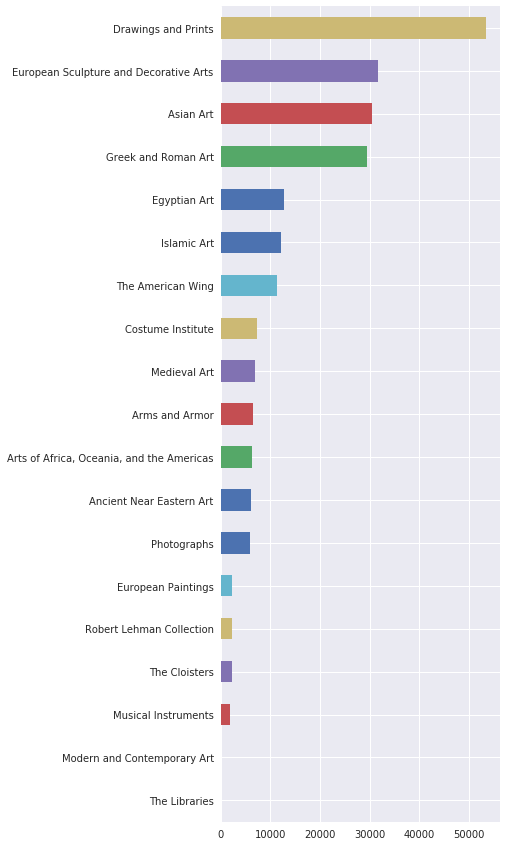

In [16]:
objects.department.value_counts(ascending=True).tail(50).plot(kind='barh', figsize=(5,15))

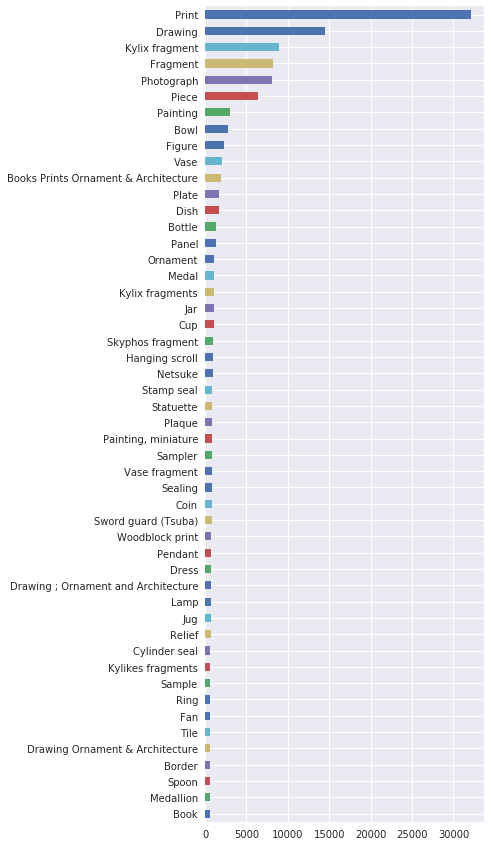

In [17]:
objects.objectName.value_counts(ascending=True).tail(50).plot(kind='barh', figsize=(5,15))

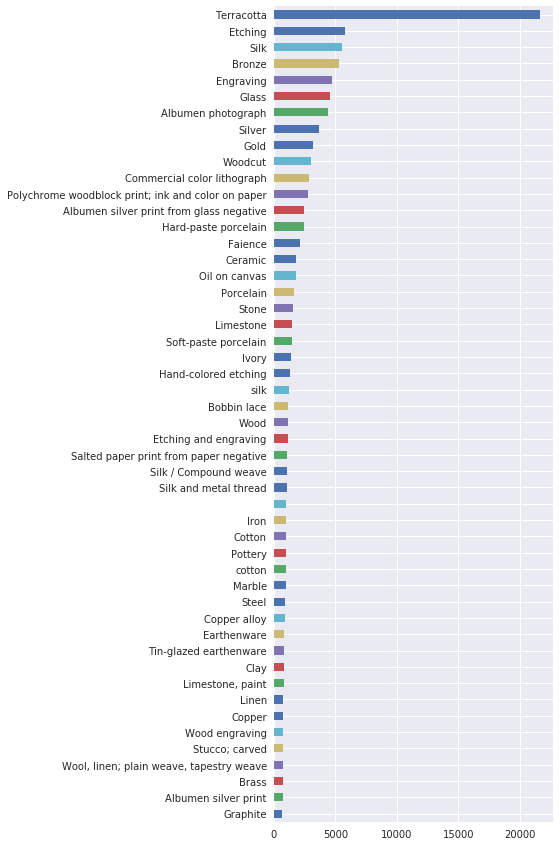

In [18]:
objects.medium.value_counts(ascending=True).tail(50).plot(kind='barh', figsize=(5,15))

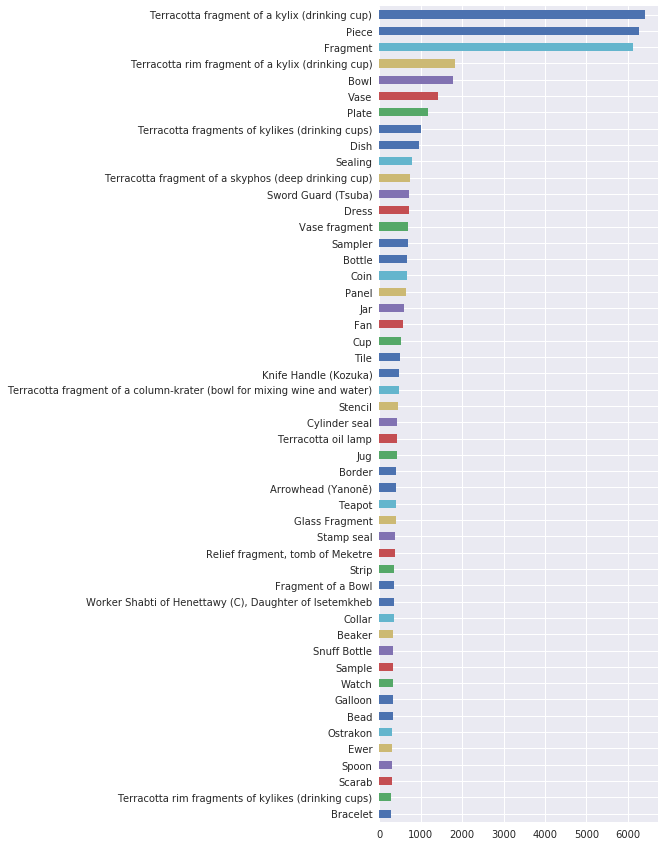

In [19]:
objects.title.value_counts(ascending=True).tail(50).plot(kind='barh', figsize=(5,15))

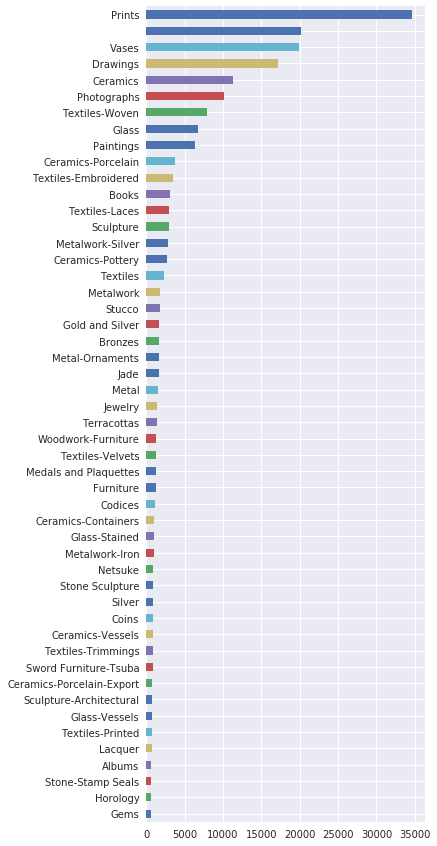

In [20]:
objects.classification.value_counts(ascending=True).tail(50).plot(kind='barh', figsize=(5,15))

In [126]:
# objects.culture.value_counts(ascending=True).tail(50).plot(kind='barh', figsize=(5,15))

In [118]:
# objects.country.value_counts(ascending=False).head(20)#.plot(kind='barh', figsize=(5,15))

In [128]:
# objects.period.value_counts(ascending=True).tail(50).plot(kind='barh', figsize=(5,15))

In [ ]:
# objects.repository.value_counts(ascending=True).tail(50).plot(kind='bar', figsize=(5,5))

In [132]:
# objects.constituents